In [19]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

In [20]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [21]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [22]:
# Get only the cubes that have our line of interest in them
mol_tag = 44003
cubes, tbl = fetch_cubes(cubefns, catalog='JPL', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=56>
   FREQ      ERR    LGINT    DR    ELO     GUP   TAG  QNFMT   QN'      QN"   
   MHz       MHz   MHz nm2        1 / cm                                     
 float64   float64 float64 int64 float64  int64 int64 int64   str8     str8  
---------- ------- ------- ----- -------- ----- ----- ----- -------- --------
85622.8384  4.3097 -7.9717     3 534.1752   138 44003  1404 34 232 3 35 135 3
85644.7545  0.0029 -7.2433     3   5.3754    18 44003  1404  4 1 3 2  3 1 3 1
85762.8856  7.6823 -7.3425     3  591.467   166 44003  1404 41 537 1 42 240 2
85798.6255  4.3011 -8.2563     3 534.1693   138 44003  1404 34 232 3 35 035 3
 85804.403  0.3031  -6.431     3 248.3688   106 44003  1404 26 423 1 25 521 1
85850.7683 25.2609 -8.2354     3 867.5658   154 44003  1404 38 929 8 391228 4
85854.2784  1.2952 -6.3928     3 418.1729   114 44003  1404 28 325 5 28 326 4
85947.6243  0.0226 -5.4368     3 170.7573    38 44003  1404  9 1 8 5  9 0 9 5
85986.4637   0.102 -6.0733     3 277.7687    

tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl


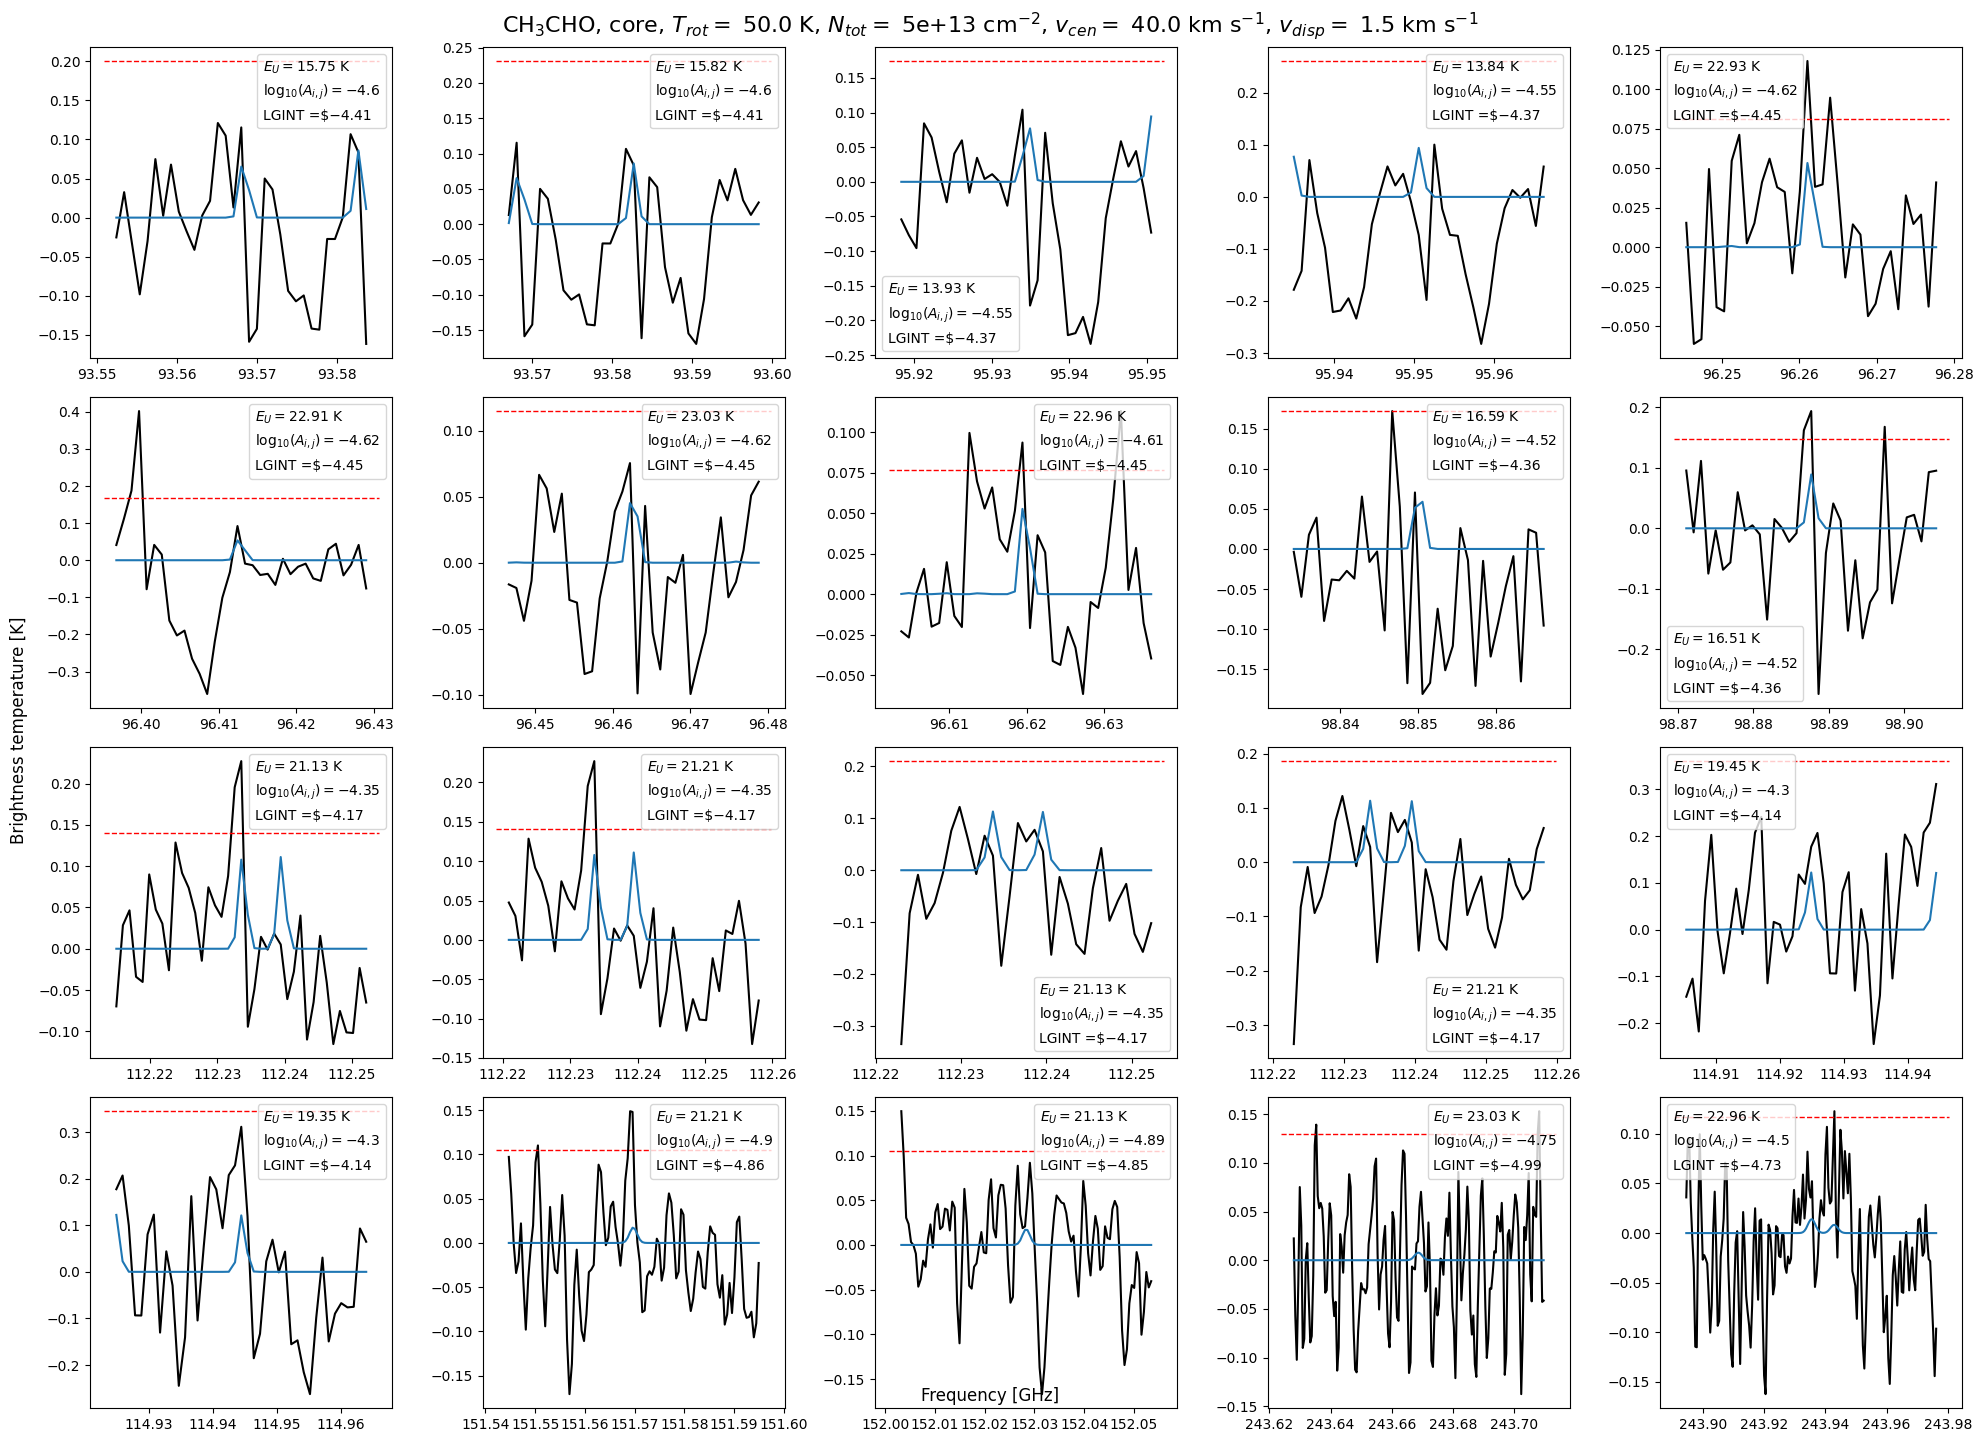

In [23]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 5.0e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
               nrows=4, ncols=5, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'CH$_3$CHO', extr_type="coord", crd=crd,
               EU_cutoff_K=25, aij_cutoff=-5, show_2_sigma=True)

In [24]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl


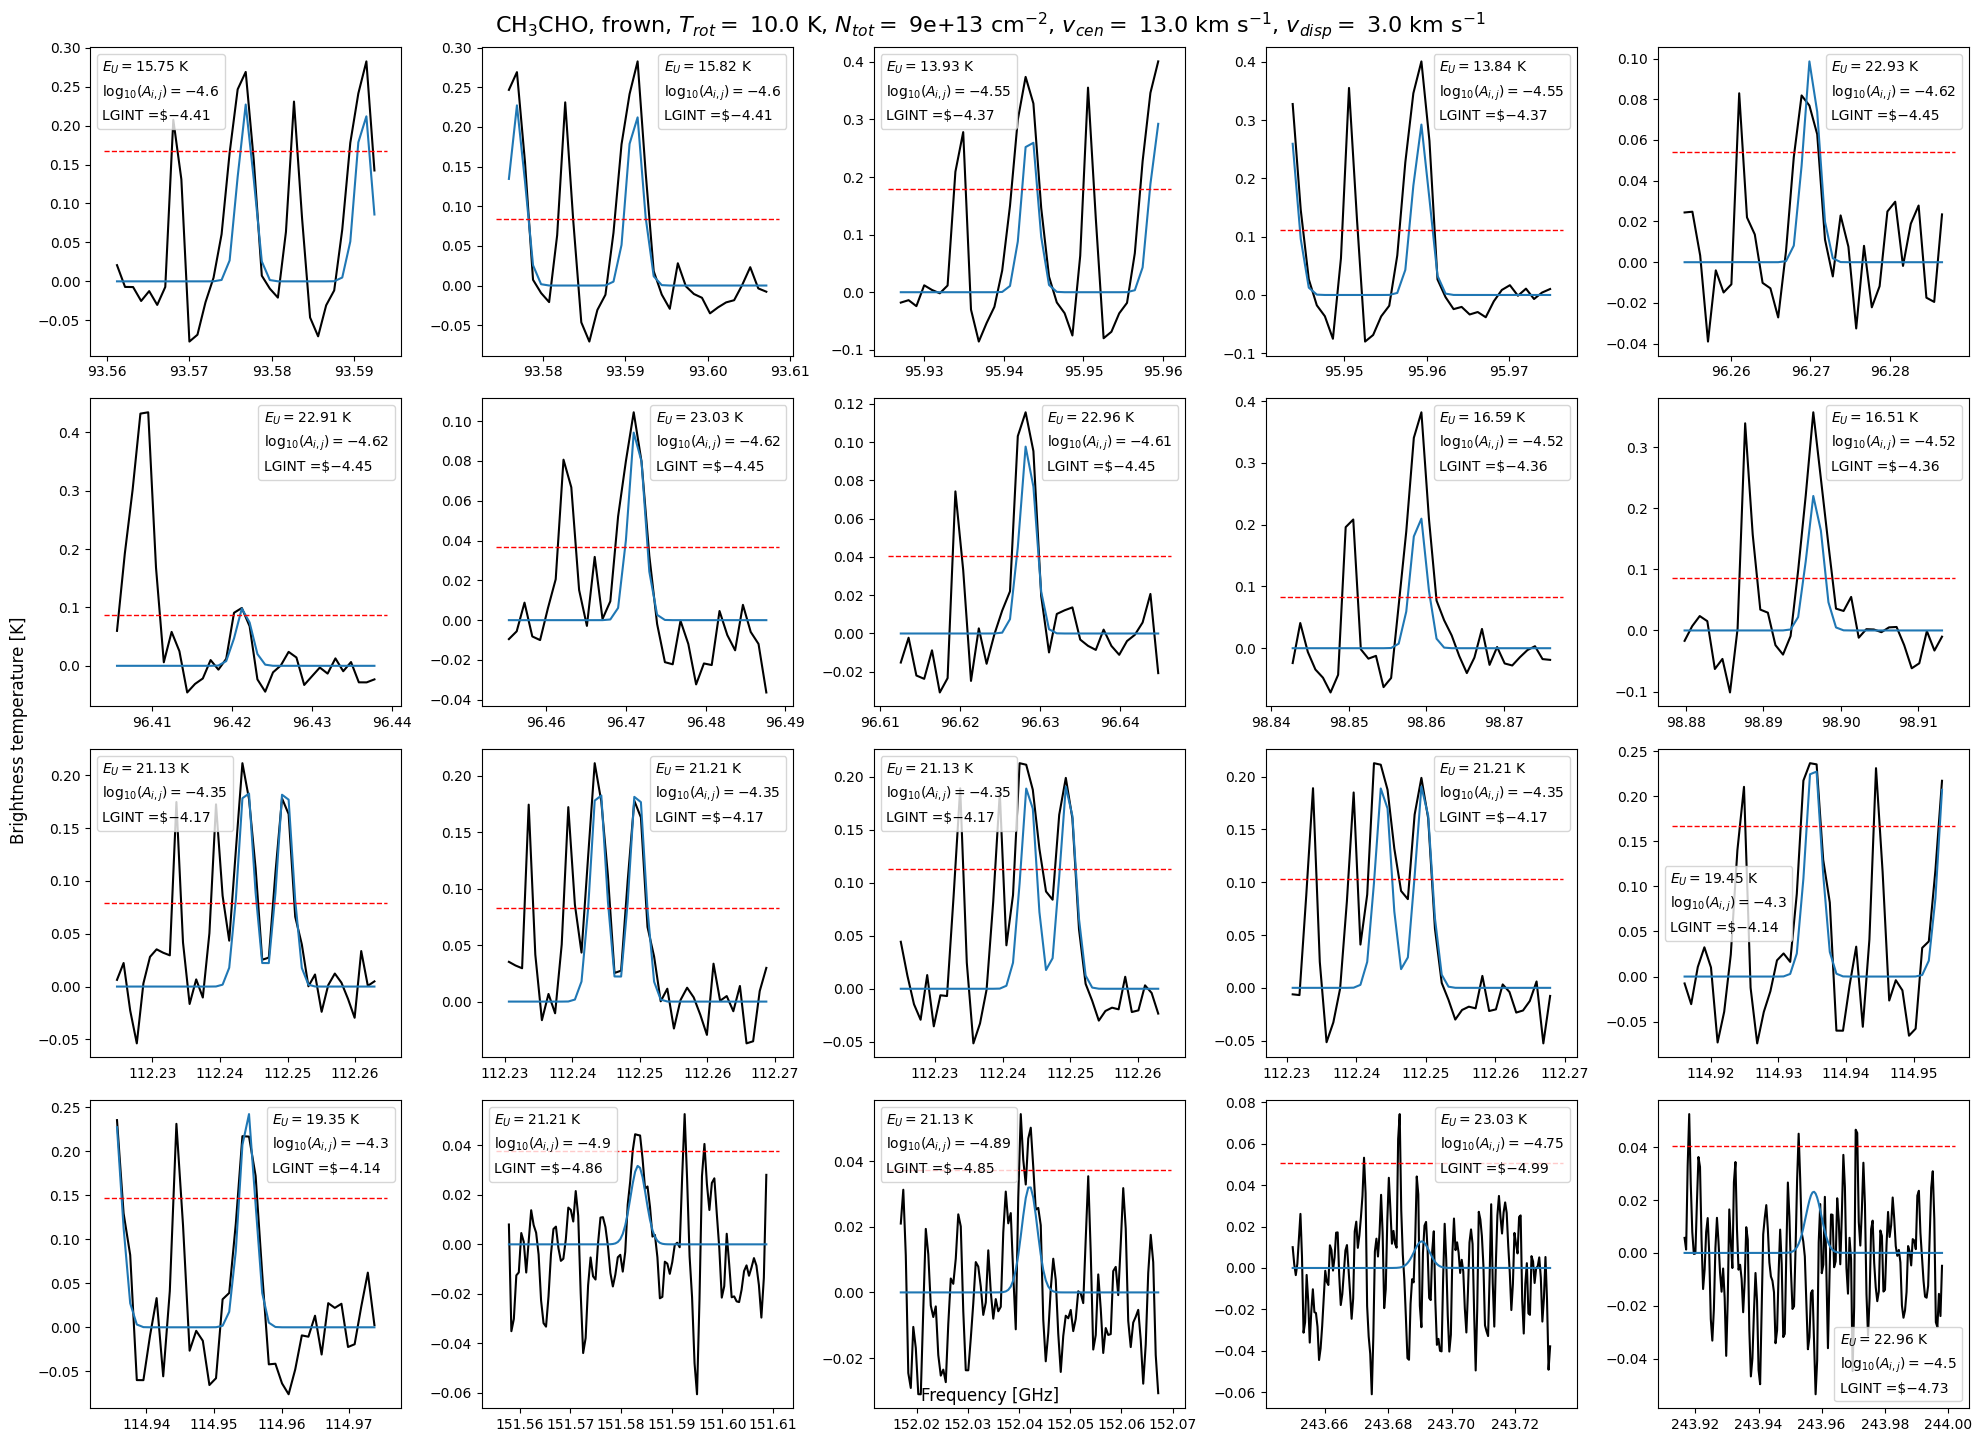

In [25]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 9.0e+13, v_cen = 13.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                       nrows=4, ncols=5, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'CH$_3$CHO', extr_type="reg", 
                       just_data=False, EU_cutoff_K=25, aij_cutoff=-5, return_freqs=True, show_2_sigma=True)

tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl
tbl


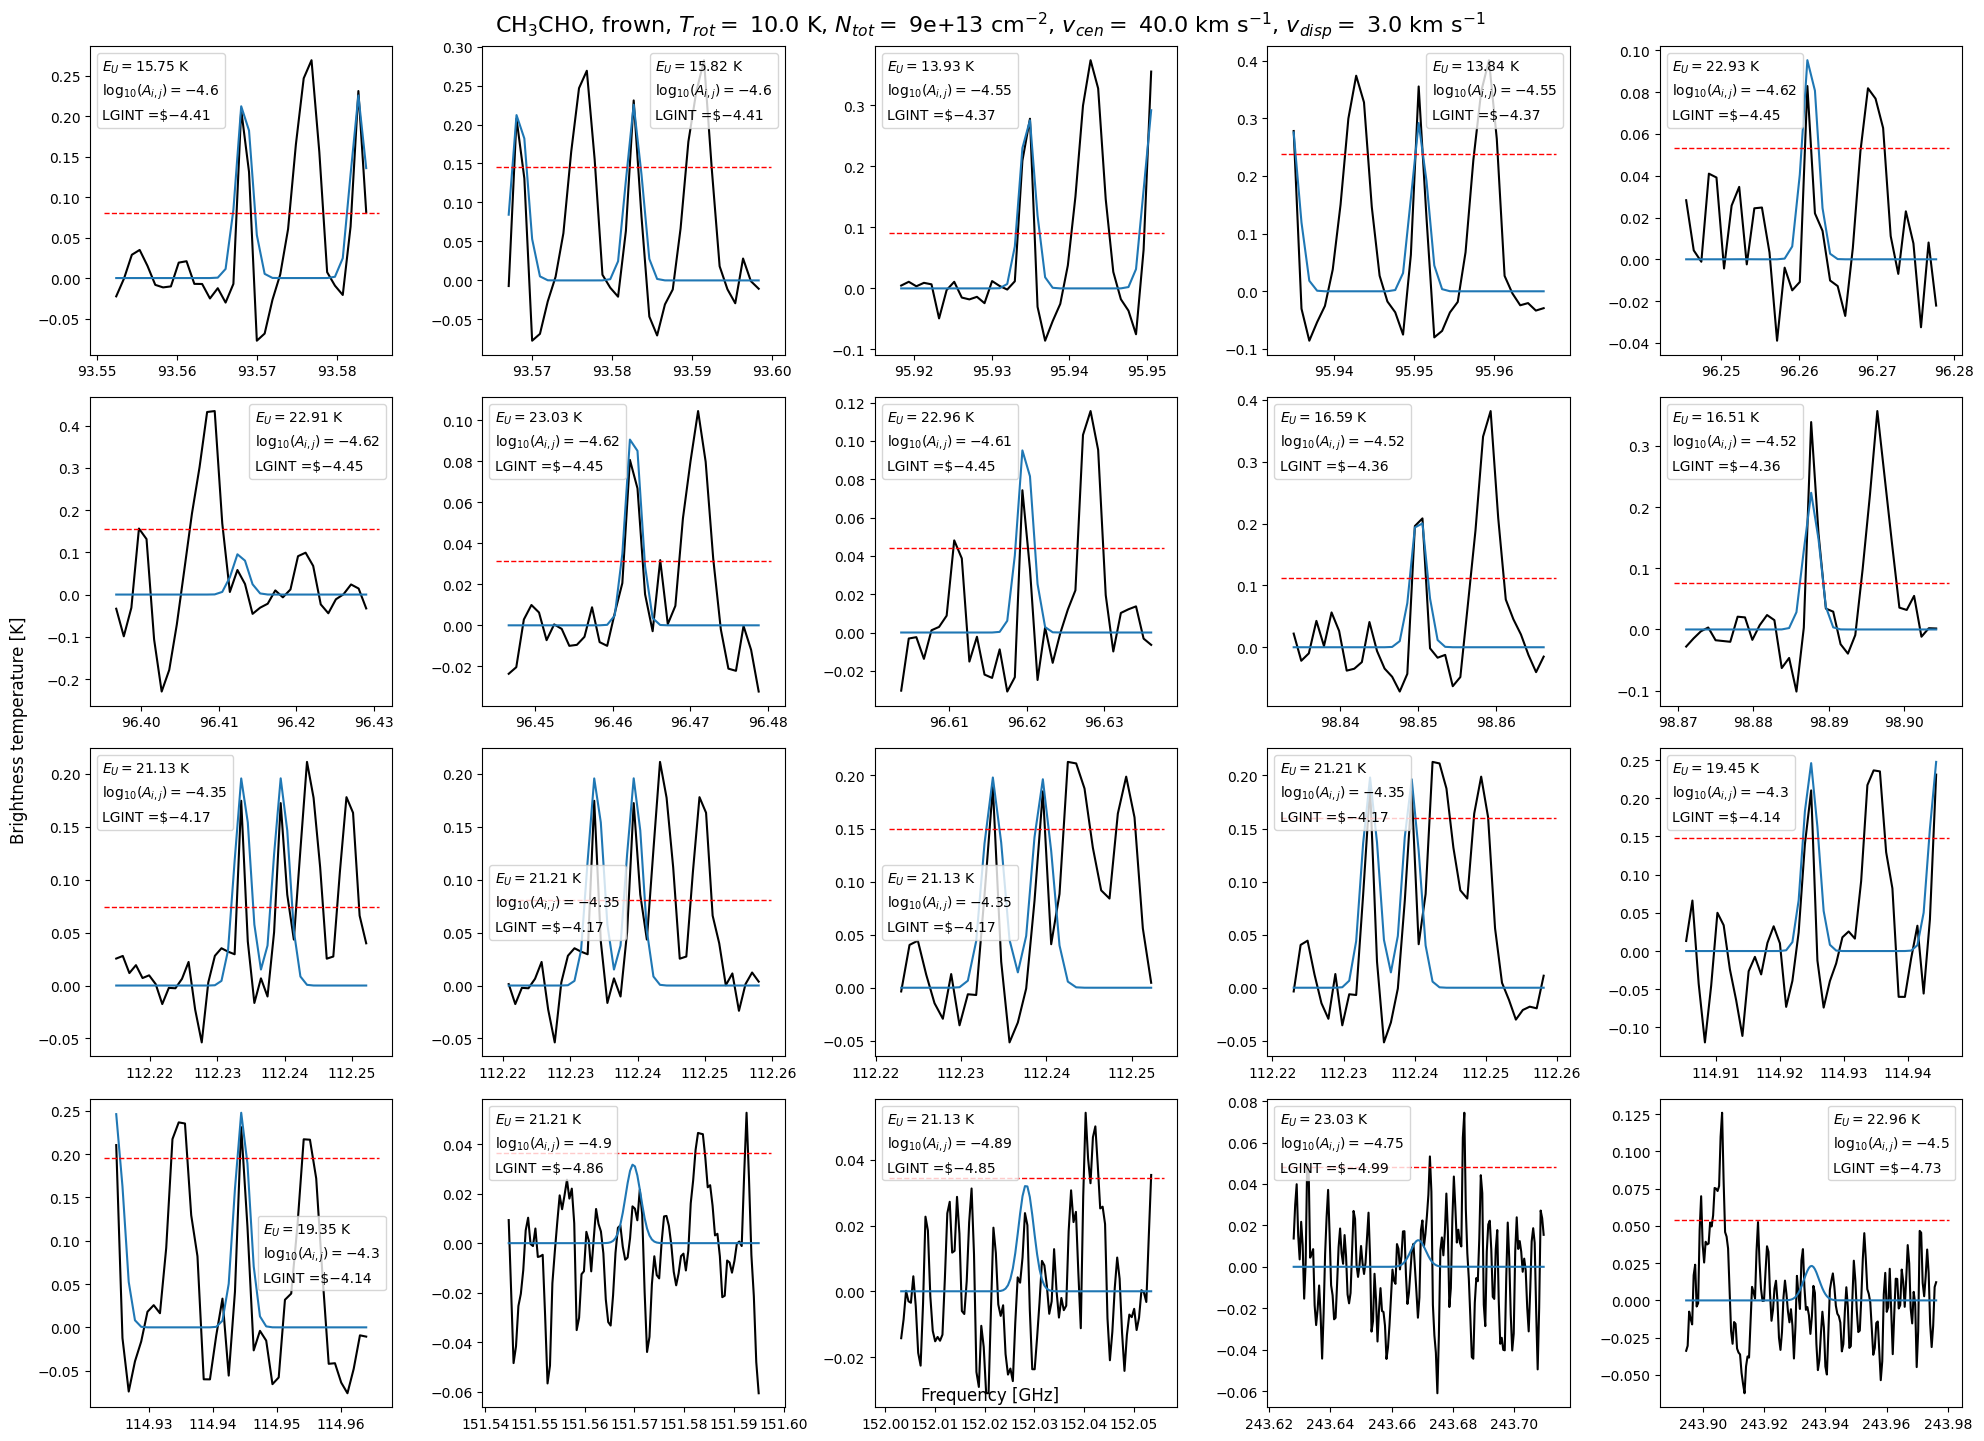

In [34]:
# Generate the model and plot the model and data spectra
EUs, log_N_upper_gs_frown = model_and_plot(cubes_masked, temp = 10., N_tot = 9.0e+13, v_cen = 40.*u.km/u.s, v_disp = 3.*u.km/u.s,
                                           mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='JPL', fig_width=20, fig_height=15, 
                                           nrows=4, ncols=5, parse_loc=False, ret_tbl=True, line_by_line=True, name_for_plot=f'CH$_3$CHO', extr_type="reg", 
                                           just_data=False, EU_cutoff_K=25, aij_cutoff=-5, calc_N_uppers=True, show_2_sigma=True)

ValueError: num must be an integer with 1 <= num <= 20, not 21

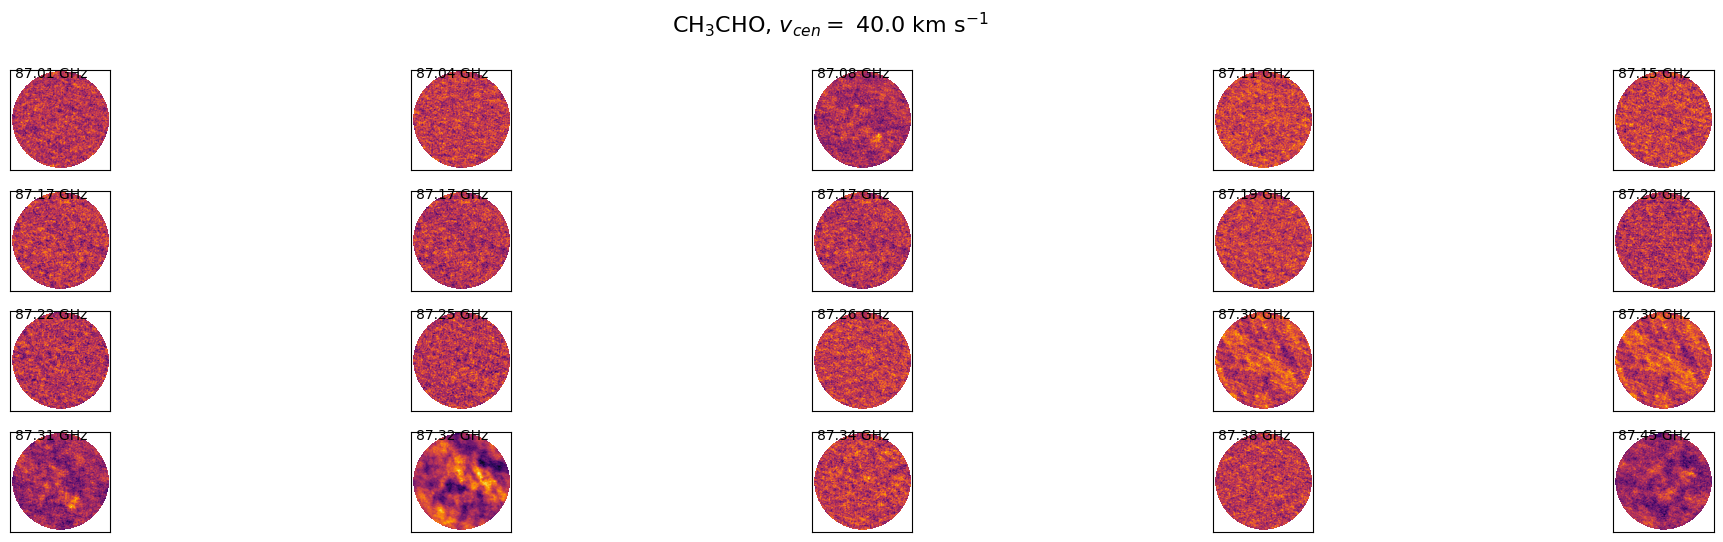

In [35]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40*u.km/u.s, fig_width=25, fig_height=8, nrows=2, ncols=10, name_for_plot=f'CH$_3$CHO')

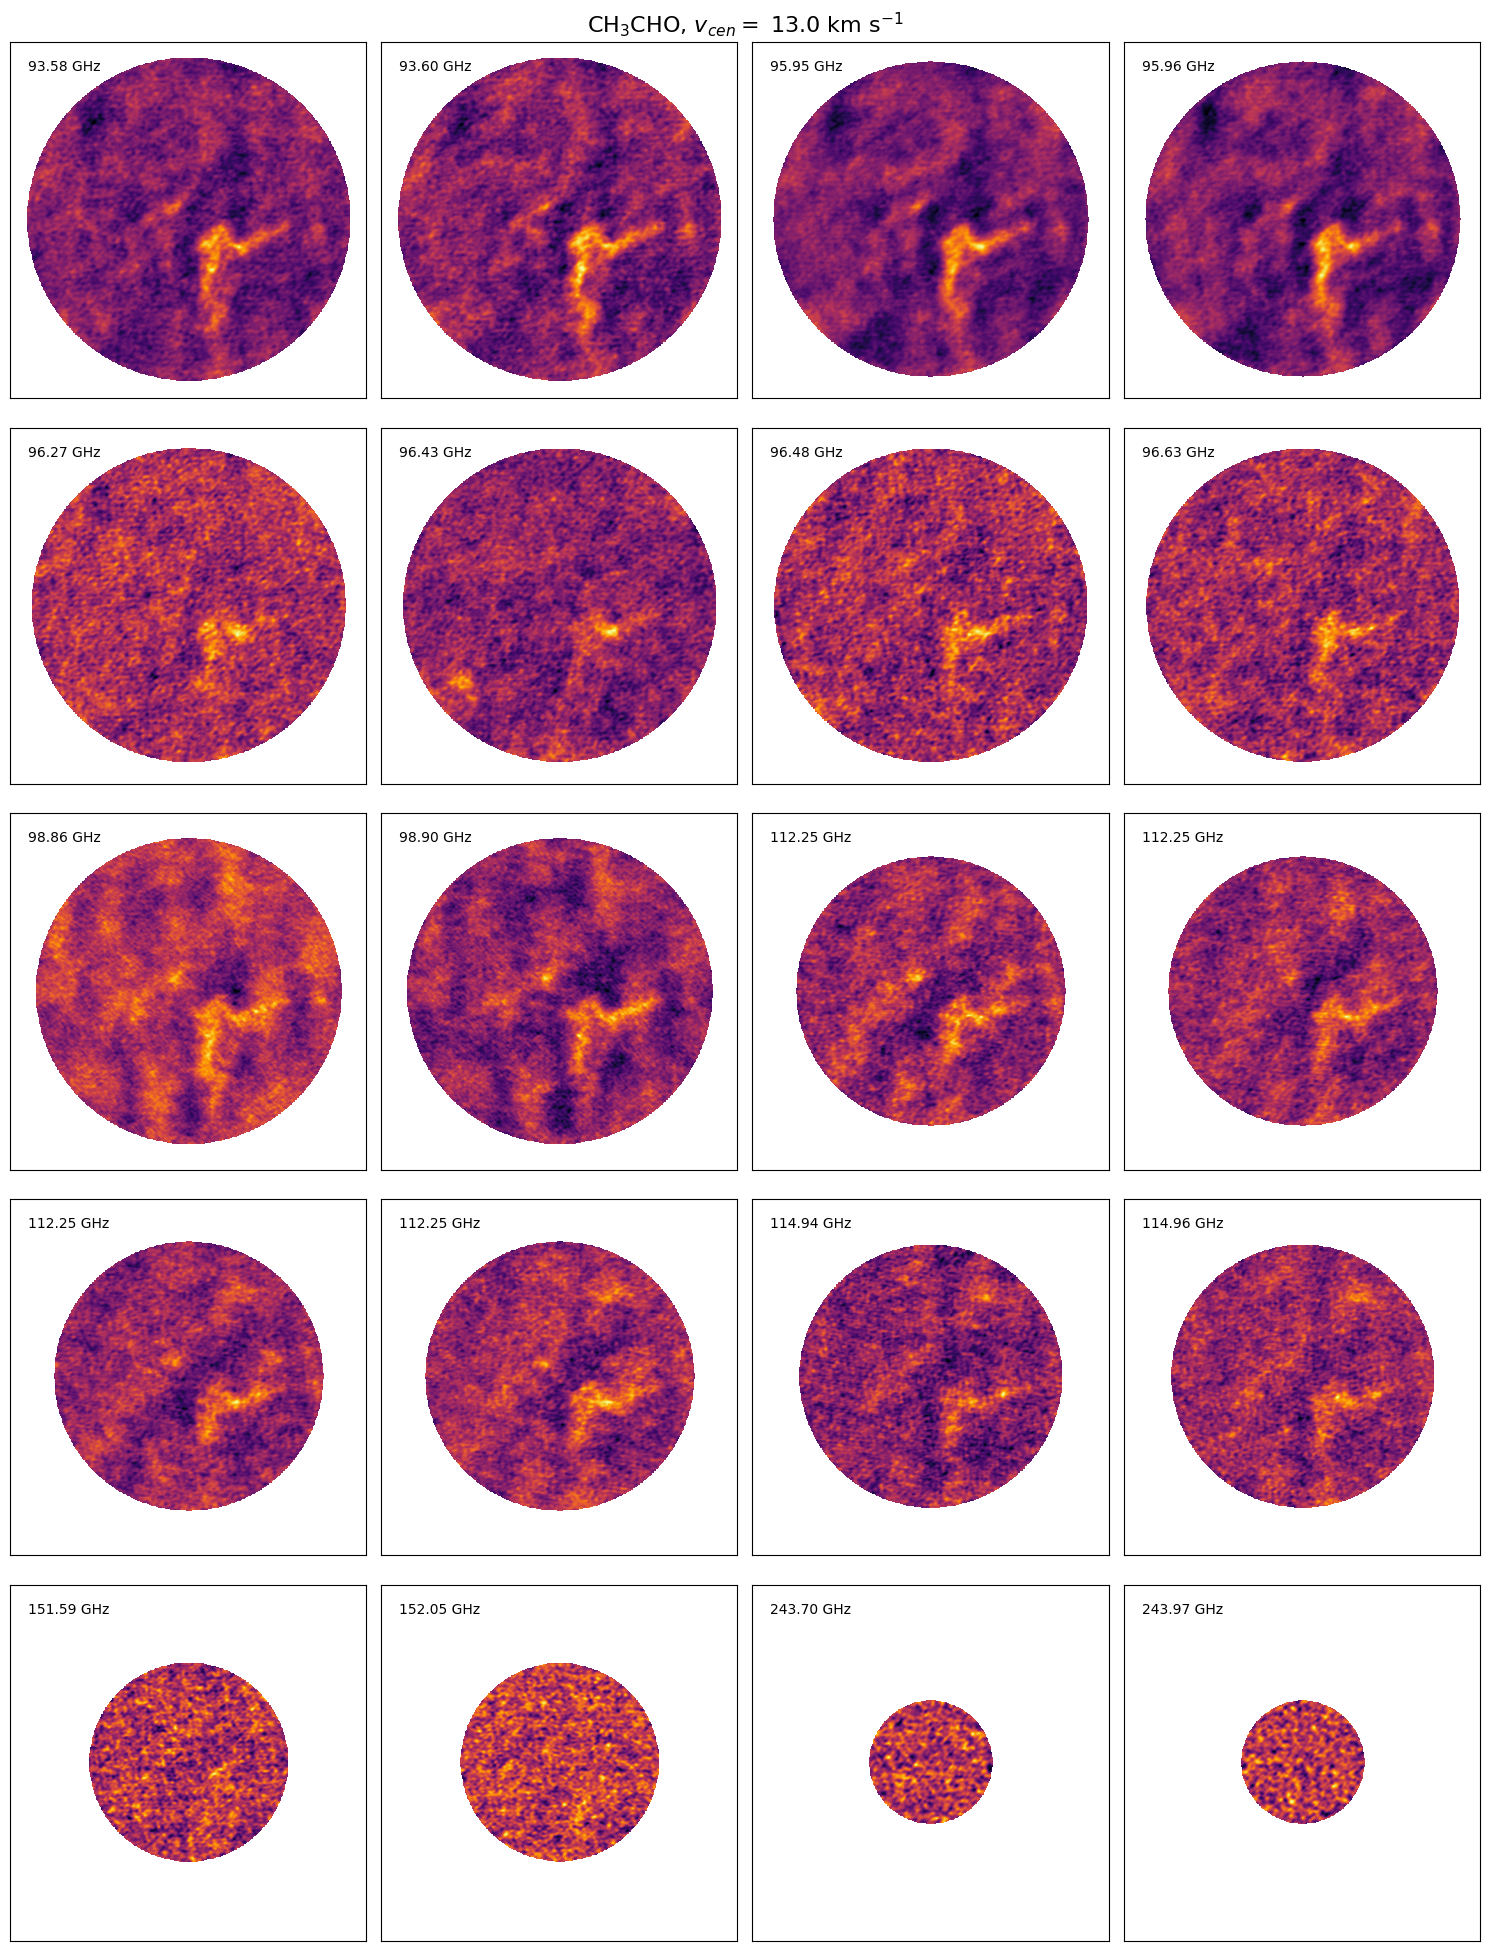

In [28]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=13*u.km/u.s, fig_width=25, fig_height=8, nrows=2, ncols=10, name_for_plot=f'CH$_3$CHO')

In [29]:
ln_N_upper_gs_frown = np.log(10.**(np.array(log_N_upper_gs_frown)))

from scipy.optimize import curve_fit
def linear(x, m, b):
    return m*x + b
EUs_vals = [EU.value for EU in EUs]

index = [17, 19]
EUs_vals = np.delete(EUs_vals, index)
log_N_upper_gs_frown = np.delete(log_N_upper_gs_frown, index)
ln_N_upper_gs_frown = np.delete(ln_N_upper_gs_frown, index)

# Do the simple linear fit
# Note to self: convert to K from ergs to do the fit, because in ergs, 
# these energies are small numbers, and that can makes the fit not work
popt_frown, pcov_frown = curve_fit(linear, EUs_vals, ln_N_upper_gs_frown) # sigma = log_N_upper_g_errs
slope_frown, intercept_frown = popt_frown[0], popt_frown[1]
temp_fit_frown = (-1./slope_frown)*u.K

from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters
freqs, aij, deg, EU, partfunc = get_molecular_parameters(molecule_name=None, molecule_tag=mol_tag, catalog='JPL', parse_name_locally=False,
                                                         return_table=False, fmin=80*u.GHz, fmax=100*u.GHz)

N_tot_fit_frown = np.log10(np.exp(intercept_frown)*partfunc(temp_fit_frown))

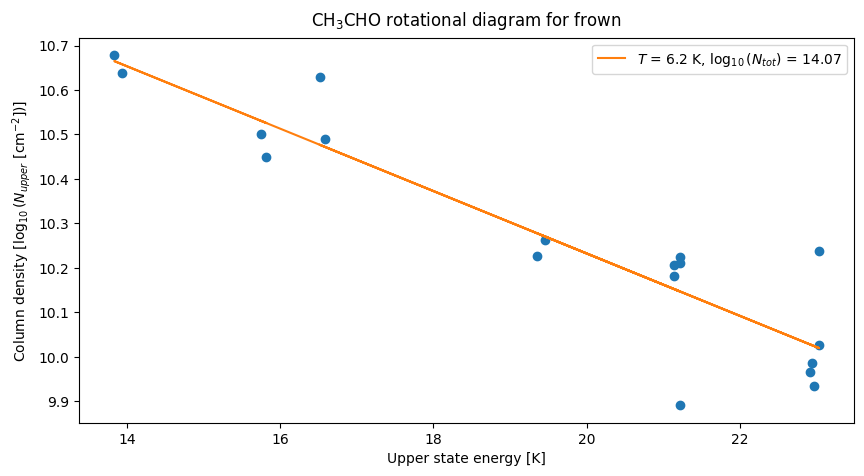

In [30]:
### Make rotational diagram for CH3CHO (frown)
fig = plt.figure(figsize = (10, 5))
plt.scatter(EUs_vals, log_N_upper_gs_frown)
plt.plot(EUs_vals, np.log10(np.exp(np.array(EUs_vals)*slope_frown+intercept_frown)),
         color = 'tab:orange',
         label = f"$T$ = {temp_fit_frown:.1f}, $\log_{{10}}(N_{{tot}})$ = {N_tot_fit_frown:.2f}")

plt.title(f"CH$_3$CHO rotational diagram for frown", y = 1.01)
plt.xlabel(f"Upper state energy [K]")
plt.ylabel(f"Column density [$\log_{{10}}(N_{{upper}}\ [\mathrm{{cm}}^{{-2}}])$]")
plt.legend()
plt.show()

# plt.savefig(f"rot_diagram_x{brightest_pixel[1]}y{brightest_pixel[0]}.pdf", dpi = 200, facecolor='w', edgecolor='w', bbox_inches='tight')

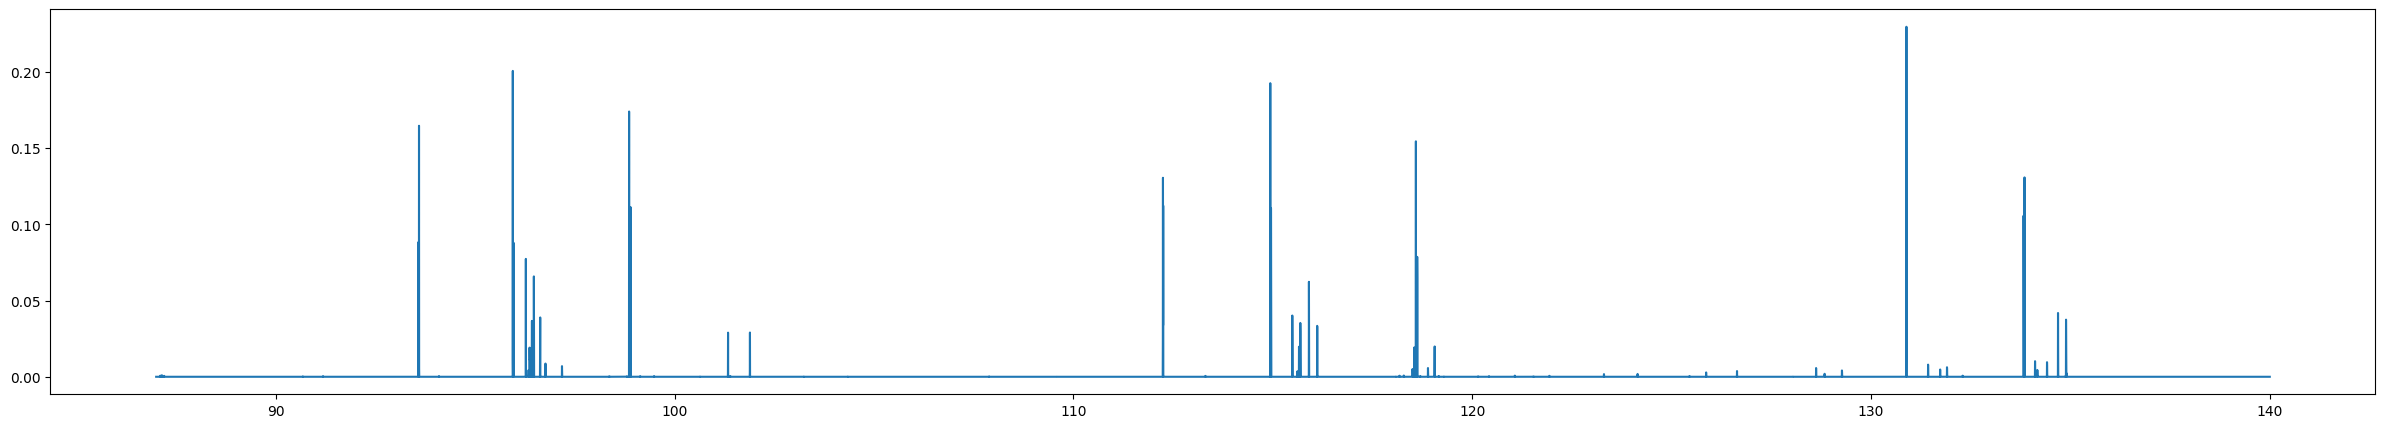

In [31]:
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters
from pyspeckit.spectrum.models import lte_molecule
freqs, aij, deg, EU, partfunc = get_molecular_parameters(molecule_name="CH3CHO", 
                                                                         molecule_tag=44003, 
                                                                         catalog='JPL', 
                                                                         parse_name_locally=False, 
                                                                         return_table=False, 
                                                                         fmin=87*u.GHz, 
                                                                         fmax=275*u.GHz)

mod = lte_molecule.generate_model(np.arange(87,140,0.003)*u.GHz, 12*u.km/u.s, 3*u.km/u.s, 10, 7.5e+13,
                                                      freqs, aij, deg, EU, partfunc)
plt.figure(figsize=(30,5))
plt.plot(np.arange(87,140,0.003), mod)
# plt.xlim(87,275)

In [32]:
acet_to_ethy_core = 5.0E+13/3.0E+13
acet_to_ethy_frwn = 9.0E+13/1.5E+13
print(acet_to_ethy_core, acet_to_ethy_frwn)

1.6666666666666667 6.0
